## Notes

 - variable target : Diabetes_binary

- Nombre de lignes : 70692

- Nombre de colonnes : 22

- Type de variables : `float64` à convertir tous en entier

- Analyse des valeurs manquantes : Pas de valeurs manquantes

### Examination du target : 
 - Il existe deux modalité sur la variable cible. Les valeurs sont encodé en 0 et 1. 
  - Apres une analyse on voit que les données sont équilibre c'est à dire y'a autant de individus diabete et non diabete

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Analyse de forme

In [32]:
data0 = pd.read_csv(r"C:\Users\jules\OneDrive\Documents\COURS PROJET\Mlops\ZenML\data_diabetes\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data = data0.copy()

target_name = "Diabetes_binary"
data[target_name] = data[target_name].astype(int)

data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [33]:
data.shape

(70692, 22)

In [12]:
data.dtypes

Diabetes_binary           int32
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [15]:
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Analyse plus détaillé

In [55]:
code_target = {0 : "non_diabete",  1: "diabete"}
data[target_name] = data[target_name].map(code_target)

In [51]:
columns_data = list(data.columns)
bmi_column = "BMI"
columns_data_without_bmi = list(set(columns_data).difference(set([bmi_column])))

data[columns_data_without_bmi]  = data[columns_data_without_bmi].astype(int)

### Examination du target

<AxesSubplot:>

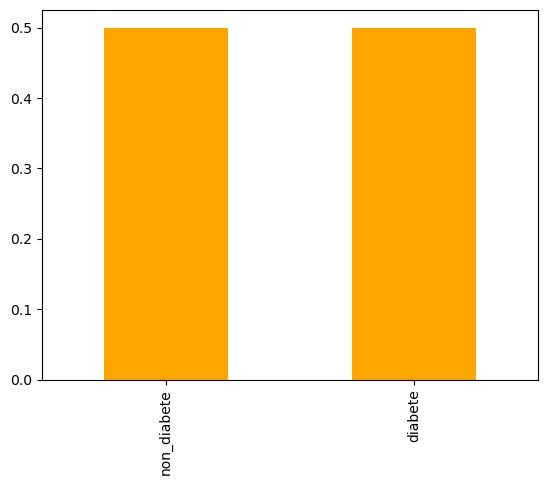

In [25]:
data[target_name].value_counts(normalize=True).plot.bar(color="orange")

### Distribution des variables

#### variable `BMI`

In [59]:
diabete_df = data[data[target_name] == "diabete"] 
non_diabete_df = data[data[target_name] == "non_diabete"] 

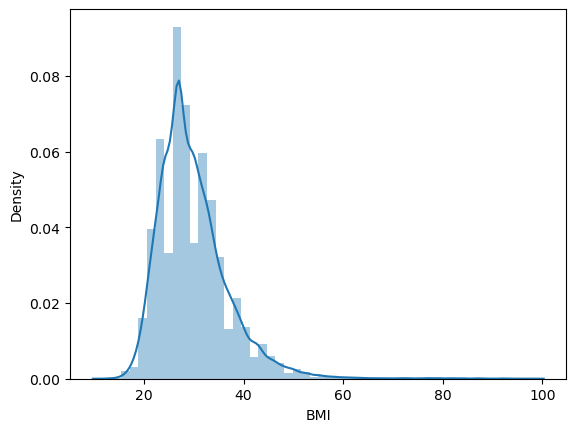

In [61]:
sns.distplot(data[bmi_column])
plt.show()

#### BMI / Variable target

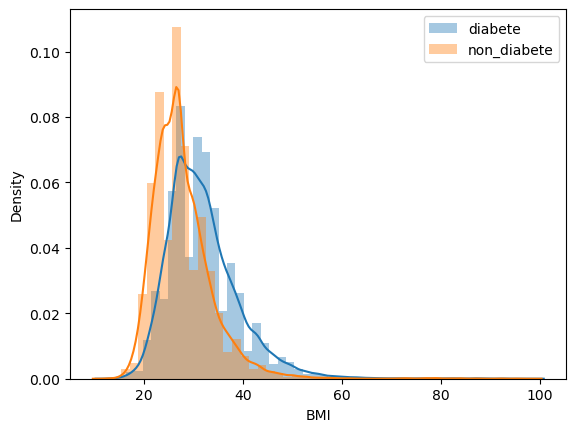

In [62]:
sns.distplot(diabete_df[bmi_column], label="diabete")
sns.distplot(non_diabete_df[bmi_column], label="non_diabete")
plt.legend()
plt.show()

In [65]:
columns_data_without_bmi
for col in columns_data_without_bmi:
    print(col)
    print(len(data[col].unique()))

PhysHlth
31
Sex
2
HeartDiseaseorAttack
2
Smoker
2
HvyAlcoholConsump
2
GenHlth
5
AnyHealthcare
2
DiffWalk
2
NoDocbcCost
2
HighChol
2
MentHlth
31
Fruits
2
Income
8
Veggies
2
CholCheck
2
Age
13
HighBP
2
Diabetes_binary
2
PhysActivity
2
Education
6
Stroke
2


### Variable Qualitatives

In [72]:
binary_columns = [col for col in columns_data_without_bmi if len(data[col].unique()) == 2]
binary_columns = list(set(binary_columns).difference(set([target_name])))

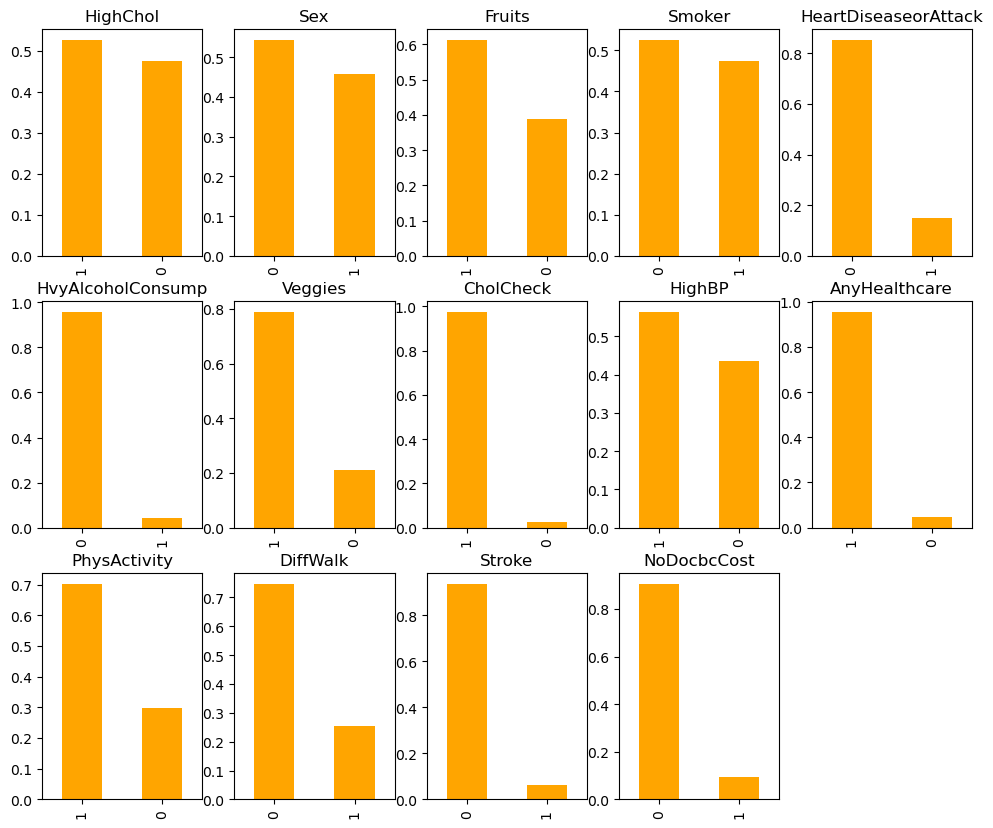

In [79]:
plt.figure(figsize=(12, 10))
i = 0
for col in binary_columns:
    i+= 1
    plt.subplot(3, 5, i)
    data[col].value_counts(normalize=True).plot.bar(color="orange")
    plt.title(col)

In [86]:
diabete_df["Sex"].value_counts(normalize=False)

0    18411
1    16935
Name: Sex, dtype: int64

In [85]:
non_diabete_df["Sex"].value_counts(normalize=False)

0    19975
1    15371
Name: Sex, dtype: int64

### Variable binary columns / Target

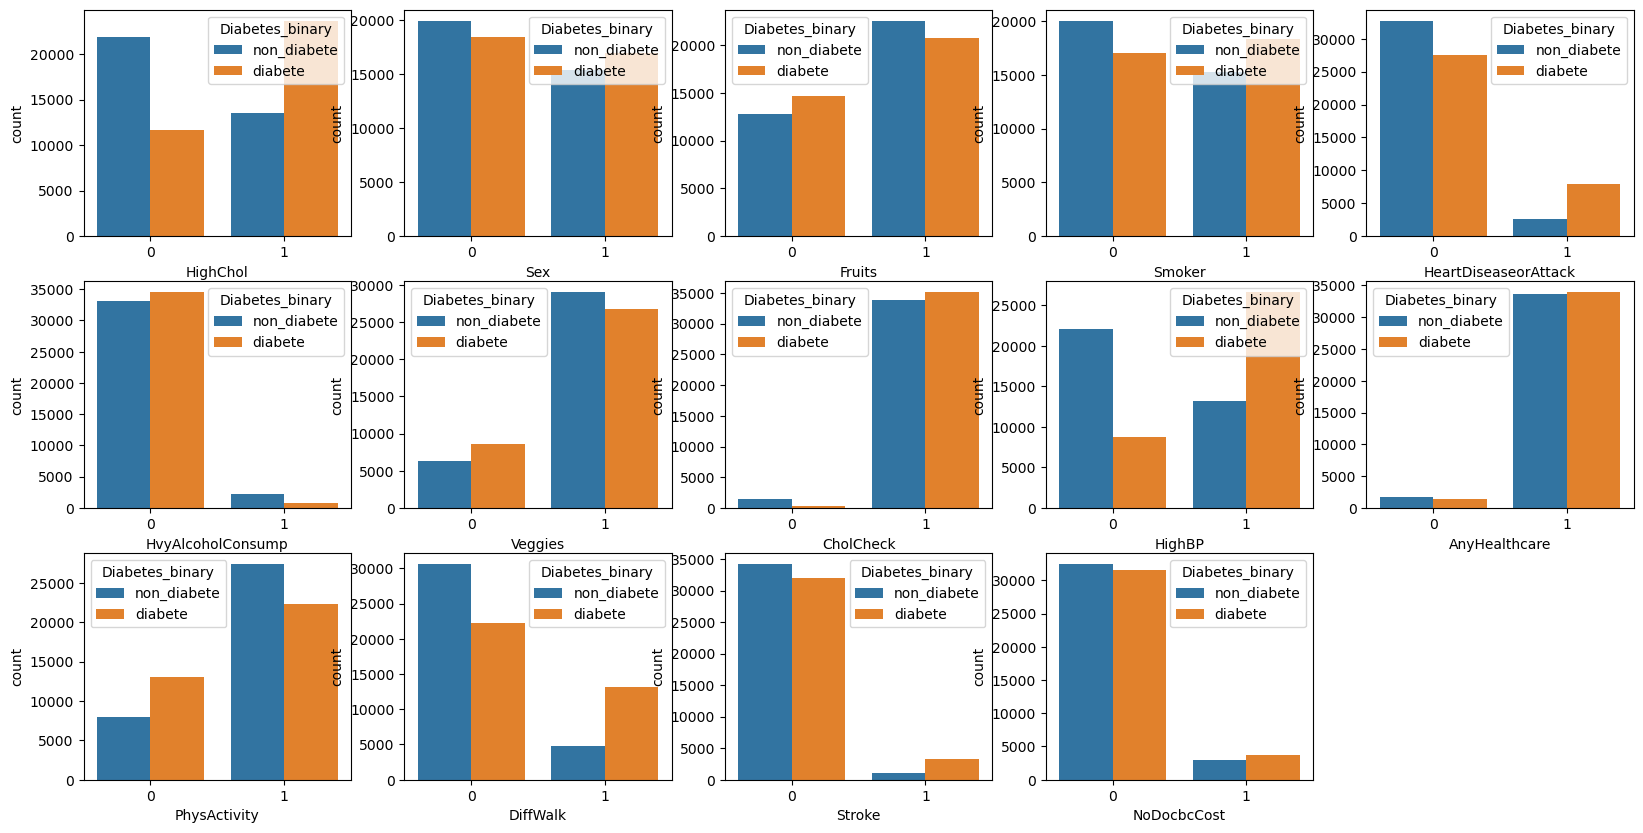

In [89]:
plt.figure(figsize=(20, 10))
i = 0
for col in binary_columns:
    i+= 1
    plt.subplot(3, 5, i)
    sns.countplot(x=col, hue=target_name, data=data)
    

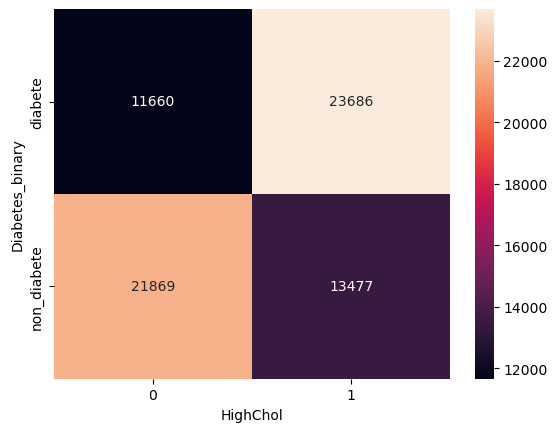

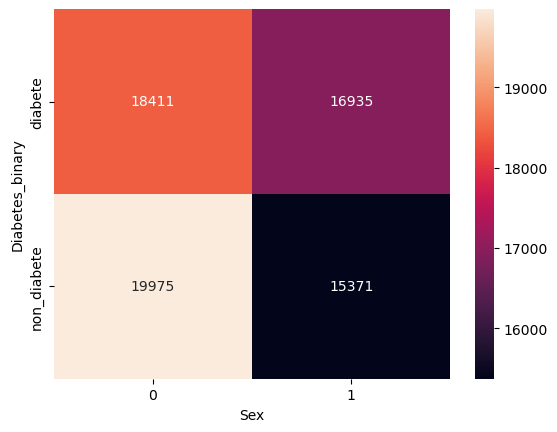

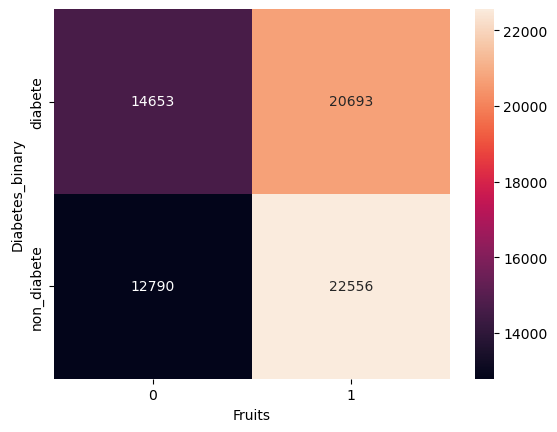

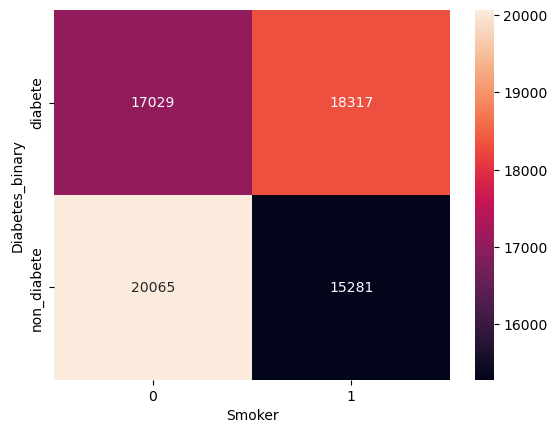

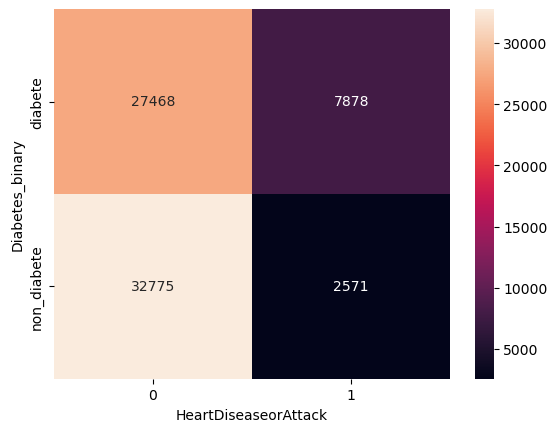

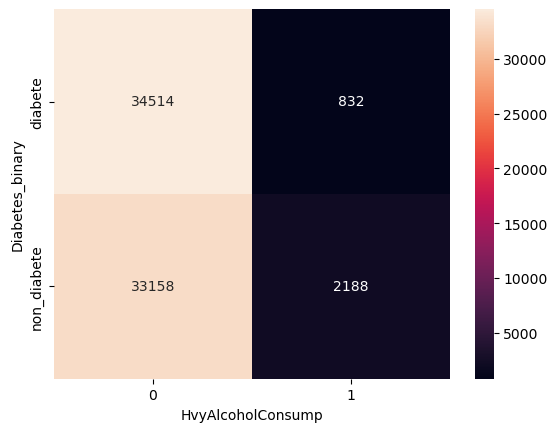

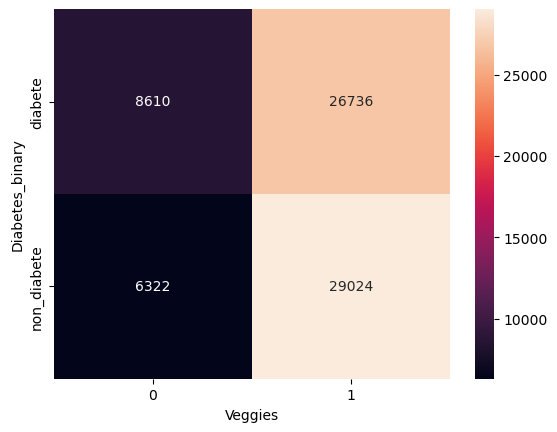

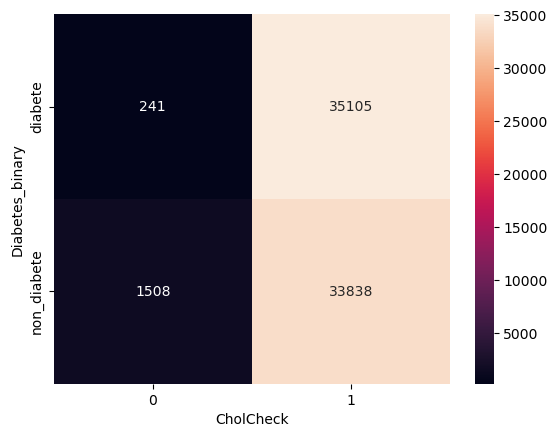

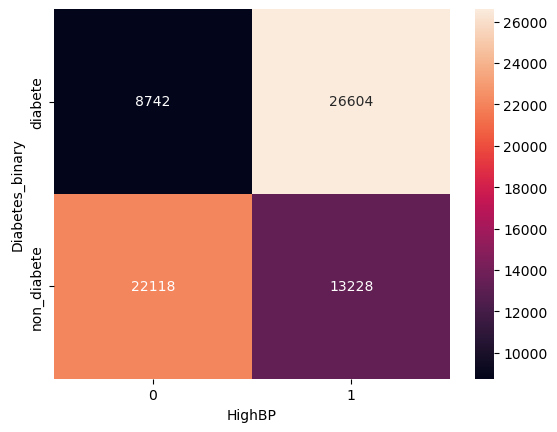

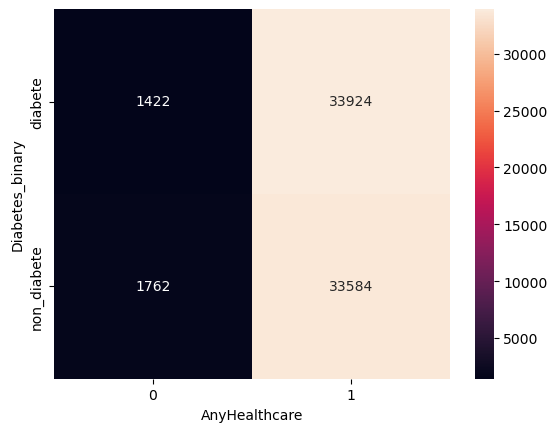

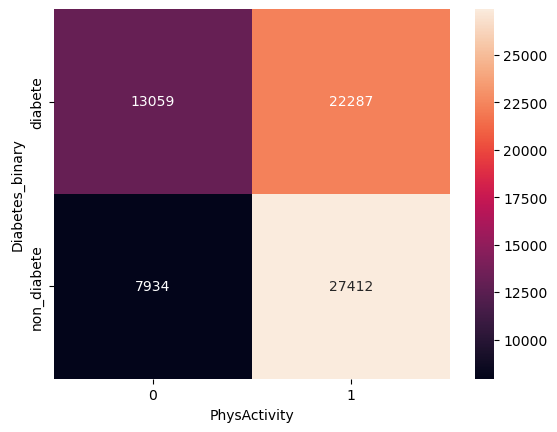

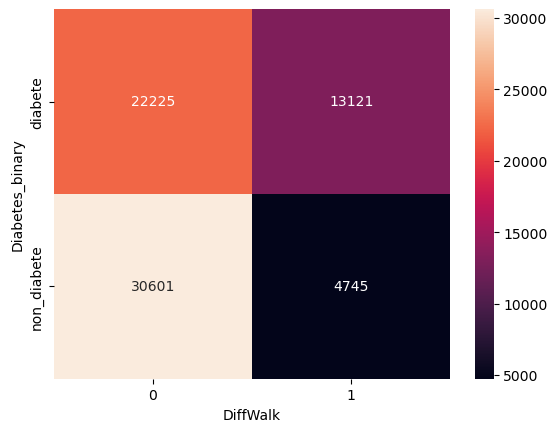

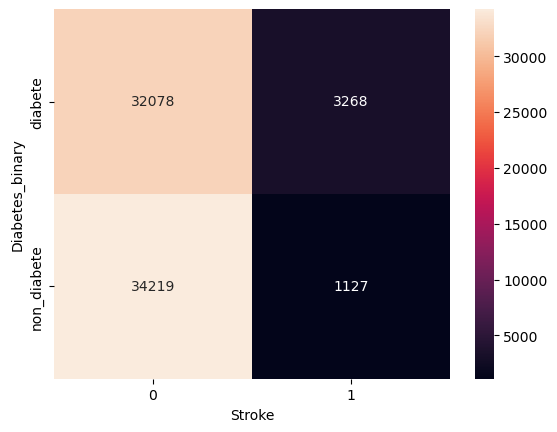

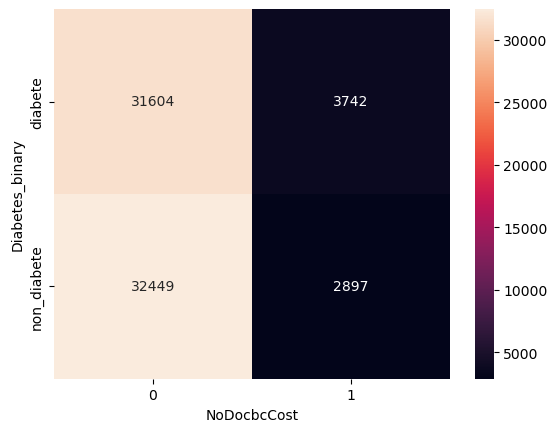

In [90]:
for col in binary_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(data[target_name], data[col]), annot=True, fmt="d")

### Variable Qualitatives avec plus de 2 modalités

In [106]:
categorical_variables = list(set(columns_data_without_bmi).difference(set(binary_columns + [target_name])))
categorical_variables

['PhysHlth', 'MentHlth', 'Income', 'Age', 'GenHlth', 'Education']

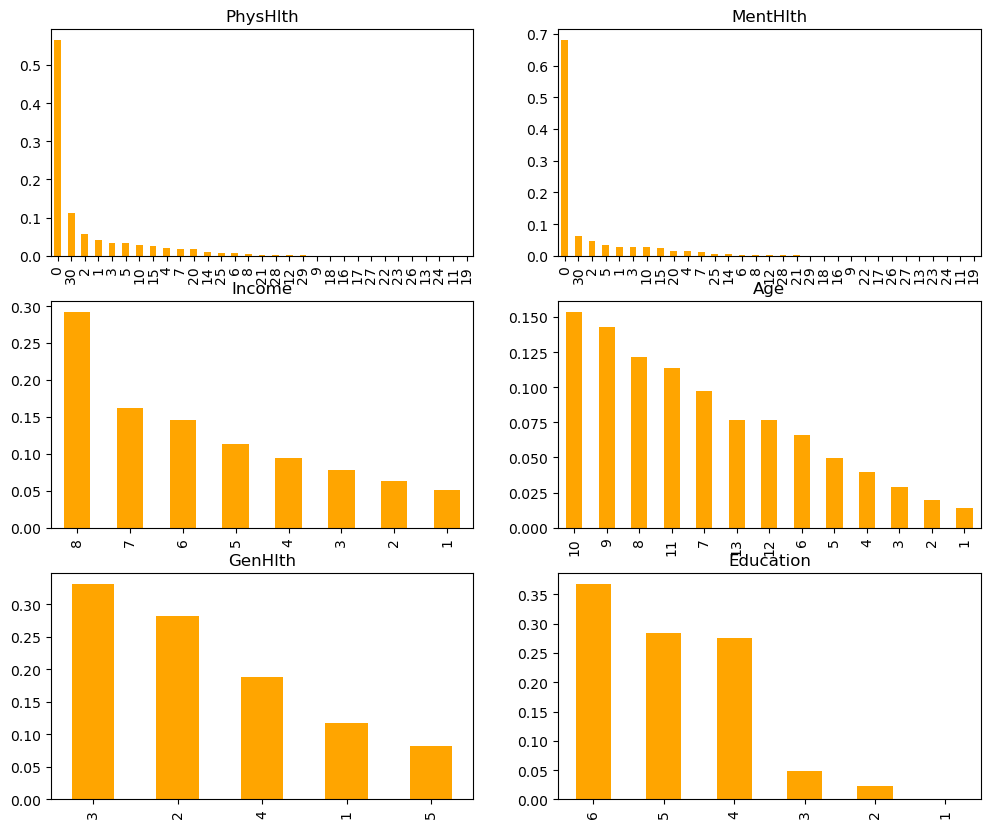

In [115]:
plt.figure(figsize=(12, 10))
i = 0
for col in categorical_variables:
    i+= 1
    plt.subplot(3, 2, i)
    data[col].value_counts(normalize=True).plot.bar(color="orange")
    plt.title(col)

### Variable Qualitatives / Target

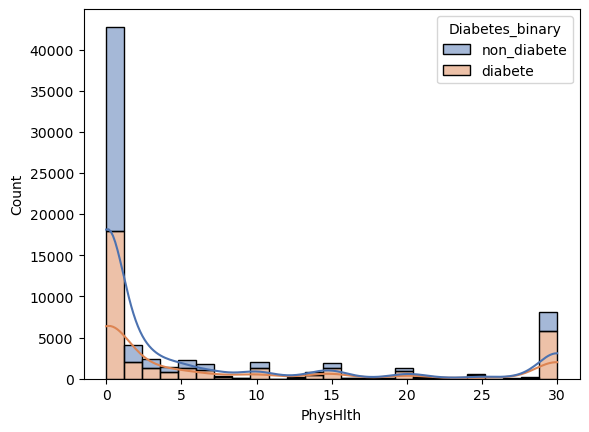

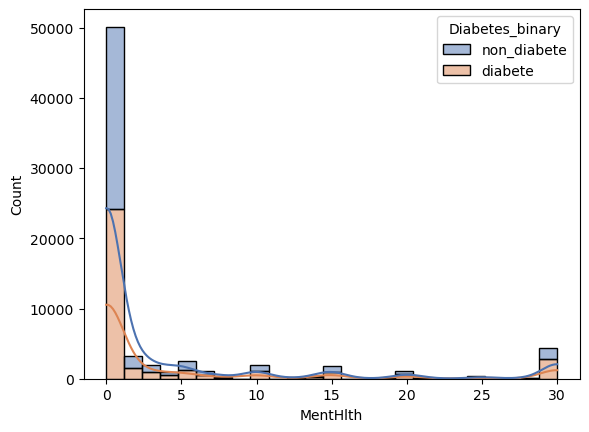

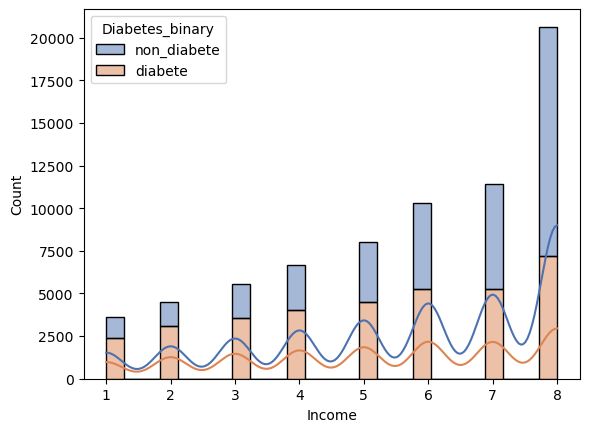

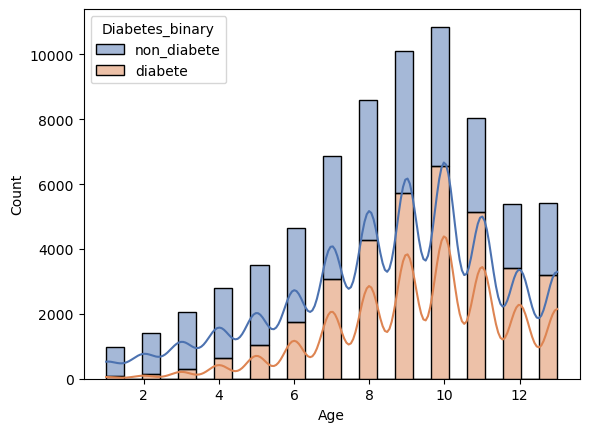

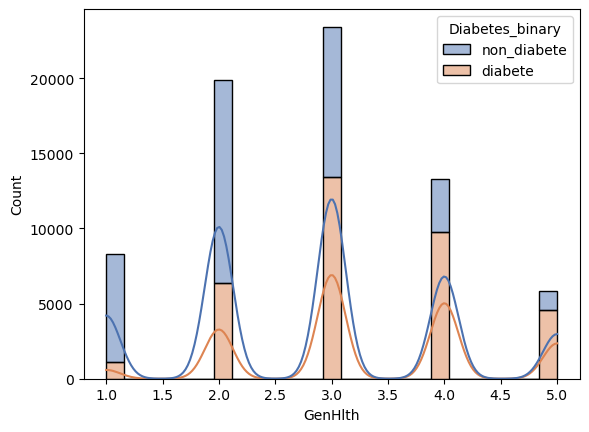

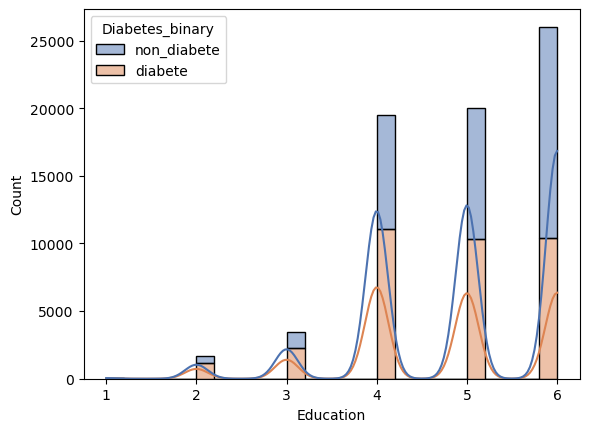

In [114]:
for col in categorical_variables:
    plt.figure()
    sns.histplot(data, x=col, kde=True, bins=25, hue=target_name, multiple='stack', palette='deep')

### Eliminer les lignes dupliquées

In [126]:
no_duplicated_data = data[data.duplicated(keep="first") == False]
no_duplicated_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,non_diabete,1,0,1,26.0,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,non_diabete,1,1,1,26.0,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,non_diabete,0,0,1,26.0,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,non_diabete,1,1,1,28.0,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,non_diabete,0,0,1,29.0,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,diabete,0,1,1,37.0,0,0,0,0,0,...,1,0,4,0,0,0,0,6,4,1
70688,diabete,0,1,1,29.0,1,0,1,0,1,...,1,0,2,0,0,1,1,10,3,6
70689,diabete,1,1,1,25.0,0,0,1,0,1,...,1,0,5,15,0,1,0,13,6,4
70690,diabete,1,1,1,18.0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
